<a href="https://colab.research.google.com/github/BlackAngel2108/ML-practice/blob/main/%22HomeWorkFifa25ML_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Copyright Kulaev Zhenya and Sobol Lyubov

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Загрузка данных
players_data = pd.read_csv('/male_players.csv')

# Информация о датасете

Этот датасет содержит информацию о мужских игроках из игры EA Sports FC 25, включая их рейтинги и всю подробную статистику.

В нашем случае, мы будем преугадывать по нашим характеристикам(признакам), к какому классу позиций относится тот или иной игрок.  

Будет 4 класса  
1) `GK` - голкипер(вратарь).  
2) `CB`, `LB`, `RB` - защита.  
3) `CM`, `CAM`, `RM`, `LM`, `CDM` - полузащита.  
4) `ST`, `LW`, `RW` - нападающий

In [5]:
players_data.shape

(16161, 58)

In [6]:
players_data

,Unnamed: 0.1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,0,1,Kylian Mbappé,91,97,90,80,92,36,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,1,2,Rodri,91,66,80,86,84,87,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,2,4,Erling Haaland,91,88,92,70,81,45,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,3,5,Jude Bellingham,90,80,87,83,88,78,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,4,7,Vini Jr.,90,95,84,81,91,29,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16156,16156,16156,17717,Engson Singh,47,31,45,47,52,34,...,India,ISL,Mohun Bagan SG,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
16157,16157,16157,17717,Ousmane Sylla,47,67,38,46,45,40,...,Senegal,MLS,Houston Dynamo,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
16158,16158,16158,17717,Wei Feng,47,57,47,38,50,43,...,China PR,CSL,Changchun Yatai,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
16159,16159,16159,17717,Won Hui Do,47,66,35,46,46,41,...,Korea Republic,K League 1,Jeju United,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [7]:
players_data.head()

,Unnamed: 0.1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,0,1,Kylian Mbappé,91,97,90,80,92,36,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,1,2,Rodri,91,66,80,86,84,87,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,2,4,Erling Haaland,91,88,92,70,81,45,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,3,5,Jude Bellingham,90,80,87,83,88,78,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,4,7,Vini Jr.,90,95,84,81,91,29,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


# Делаем подтаблицу из данных, которые нам нужны

In [8]:
# Убираем указанные столбцы
columns_to_drop = ["Unnamed: 0.1","Unnamed: 0","Rank",'Age', 'Name', 'Nation', 'League', 'Team', 'play style',
                   'url', 'Weak foot', 'Skill moves', 'Preferred foot']

new_players_data = players_data.drop(columns=columns_to_drop)

# Просмотр новой таблицы
new_players_data.head()

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,...,Aggression,Position,Height,Weight,Alternative positions,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,91,97,90,80,92,36,78,97,97,93,...,64,ST,"182cm / 6'0""",75kg / 165lb,LW,NaN,NaN,NaN,NaN,NaN
1,91,66,80,86,84,87,85,65,66,76,...,85,CDM,"191cm / 6'3""",82kg / 181lb,CM,NaN,NaN,NaN,NaN,NaN
2,91,88,92,70,81,45,88,80,94,96,...,88,ST,"195cm / 6'5""",94kg / 207lb,NaN,NaN,NaN,NaN,NaN,NaN
3,90,80,87,83,88,78,83,81,80,91,...,85,CAM,"186cm / 6'1""",75kg / 165lb,CM,NaN,NaN,NaN,NaN,NaN
4,90,95,84,81,91,29,69,95,95,87,...,58,LW,"176cm / 5'9""",73kg / 161lb,"ST, LM",NaN,NaN,NaN,NaN,NaN


# Наши данные

`Height`: Рост игрока.  

`Weight`: Вес игрока.  

`Position`: Основная позиция, на которой играет игрок.  

`Alternative positions`: Другие позиции, на которых игрок способен эффективно `играть.  

`Acceleration`: Способность игрока быстро достигать максимальной скорости.  

`Sprint Speed`: Максимальная скорость, которую может развить игрок во время
спринта.  

`Positioning`: Осведомленность игрока и его позиционирование в атаке.  

`Finishing`: Способность игрока превращать шансы в голы.  

`Shot Power`: Сила ударов игрока по воротам.  

`Long Shots`: Точность и сила ударов, выполненных за пределами штрафной площади.  

`Volleys`: Способность игрока точно бить по мячу с лету.  

`Penalties`: Навыки игрока при исполнении пенальти.  

`Vision`: Способность игрока точно отдавать передачи и видеть развитие игры.  

`Crossing`: Способность точно подавать мяч с флангов.  

`Free Kick Accuracy`: Точность игрока при выполнении штрафных ударов.  

`Short Passing`: Точность и мастерство коротких передач.  

`Long Passing`: Способность точно отдавать дальние передачи.  

`Curve`: Способность игрока закручивать мяч при передачах или ударах.  

`Dribbling`: Контроль мяча и способность игрока маневрировать в узких пространствах.  

`Agility`: Способность игрока быстро и плавно менять направление.  

`Balance`: Устойчивость игрока и способность сохранять равновесие под давлением.    

`Reactions`: Реакция игрока на непредсказуемые события во время игры.

`Ball Control`: Насколько хорошо игрок контролирует мяч в движении.

`Composure`: Спокойствие игрока под давлением.  

`Interceptions`: Способность игрока читать игру и перехватывать передачи.  

`Heading Accuracy`: Точность игрока при игре головой.  

`Defensive Awareness (Def Awareness)`: Позиционирование игрока и его способность предвидеть защитные ситуации.  

`Standing Tackle`: Способность игрока выигрывать борьбу за мяч стоя.  

`Sliding Tackle`: Мастерство и точность подкатов игрока.  

`Jumping`: Способность игрока высоко прыгать при игре головой или борьбе за мяч.  

`Stamina`: Выносливость игрока и его способность сохранять высокий уровень игры на протяжении матча.  

`Strength`: Физическая сила игрока и его способность выигрывать физические единоборства.  

`Aggression`: Решительность и интенсивность игрока в борьбе за мяч и дуэлях.

`GK Diving`: Способность вратаря прыгать и совершать сейвы.  

`GK Handling`: Навыки вратаря по ловле или удержанию мяча.  

`GK Kicking`: Точность и сила ударов вратаря при выбивании мяча.
  
`GK Positioning`: Способность вратаря правильно позиционировать себя в оборонительных ситуациях.  

`GK Reflexes`: Быстрота реакции вратаря на удары по воротам.  

# Обрабатываем пропущенные значения

In [9]:
# Заменяем NaN на 0 в указанных столбцах
columns_to_replace_nan = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

new_players_data[columns_to_replace_nan] = new_players_data[columns_to_replace_nan].fillna(0)

# Просмотр изменений
new_players_data

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,...,Aggression,Position,Height,Weight,Alternative positions,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,91,97,90,80,92,36,78,97,97,93,...,64,ST,"182cm / 6'0""",75kg / 165lb,LW,0.0,0.0,0.0,0.0,0.0
1,91,66,80,86,84,87,85,65,66,76,...,85,CDM,"191cm / 6'3""",82kg / 181lb,CM,0.0,0.0,0.0,0.0,0.0
2,91,88,92,70,81,45,88,80,94,96,...,88,ST,"195cm / 6'5""",94kg / 207lb,NaN,0.0,0.0,0.0,0.0,0.0
3,90,80,87,83,88,78,83,81,80,91,...,85,CAM,"186cm / 6'1""",75kg / 165lb,CM,0.0,0.0,0.0,0.0,0.0
4,90,95,84,81,91,29,69,95,95,87,...,58,LW,"176cm / 5'9""",73kg / 161lb,"ST, LM",0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16156,47,31,45,47,52,34,45,32,31,39,...,47,CAM,"169cm / 5'7""",62kg / 137lb,CM,0.0,0.0,0.0,0.0,0.0
16157,47,67,38,46,45,40,55,66,67,47,...,59,CM,"176cm / 5'9""",74kg / 163lb,NaN,0.0,0.0,0.0,0.0,0.0
16158,47,57,47,38,50,43,49,55,59,50,...,24,RB,"181cm / 5'11""",69kg / 152lb,NaN,0.0,0.0,0.0,0.0,0.0
16159,47,66,35,46,46,41,64,69,63,45,...,54,CM,"187cm / 6'2""",71kg / 157lb,NaN,0.0,0.0,0.0,0.0,0.0


In [10]:
# Убираем единицы измерения из столбцов height и weight, оставляем только цифры
new_players_data['Height'] = new_players_data['Height'].str.extract('(\d+)').astype(float)
new_players_data['Weight'] = new_players_data['Weight'].str.extract('(\d+)').astype(float)

# Просмотр изменений
print(new_players_data[['Height', 'Weight']].head())


   Height  Weight
0   182.0    75.0
1   191.0    82.0
2   195.0    94.0
3   186.0    75.0
4   176.0    73.0


In [11]:
# Заменяем NaN в столбце 'alternative positions' значениями из столбца 'position'
new_players_data['Alternative positions'] = new_players_data['Alternative positions'].fillna(new_players_data['Position'])
player_data = new_players_data.drop(columns="Alternative positions")
player_data

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,...,Strength,Aggression,Position,Height,Weight,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,91,97,90,80,92,36,78,97,97,93,...,77,64,ST,182.0,75.0,0.0,0.0,0.0,0.0,0.0
1,91,66,80,86,84,87,85,65,66,76,...,83,85,CDM,191.0,82.0,0.0,0.0,0.0,0.0,0.0
2,91,88,92,70,81,45,88,80,94,96,...,93,88,ST,195.0,94.0,0.0,0.0,0.0,0.0,0.0
3,90,80,87,83,88,78,83,81,80,91,...,77,85,CAM,186.0,75.0,0.0,0.0,0.0,0.0,0.0
4,90,95,84,81,91,29,69,95,95,87,...,65,58,LW,176.0,73.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16156,47,31,45,47,52,34,45,32,31,39,...,36,47,CAM,169.0,62.0,0.0,0.0,0.0,0.0,0.0
16157,47,67,38,46,45,40,55,66,67,47,...,53,59,CM,176.0,74.0,0.0,0.0,0.0,0.0,0.0
16158,47,57,47,38,50,43,49,55,59,50,...,57,24,RB,181.0,69.0,0.0,0.0,0.0,0.0,0.0
16159,47,66,35,46,46,41,64,69,63,45,...,68,54,CM,187.0,71.0,0.0,0.0,0.0,0.0,0.0


# Убеждаемся, что пропущенных значений нет

In [12]:
new_players_data.describe()

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,...,Stamina,Strength,Aggression,Height,Weight,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
count,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,...,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000
mean,66.172390,68.149558,54.146835,58.434874,63.599158,50.591981,65.241755,64.778727,64.812264,50.983293,...,63.426892,65.317121,56.342986,181.865602,75.279933,7.335747,7.110884,7.007549,7.151847,7.429924
std,6.761979,10.612153,13.740389,9.660646,9.262399,16.323879,9.509657,15.478648,15.258747,19.903044,...,16.450390,12.370667,16.771384,6.858398,6.953539,20.764850,20.124128,19.851371,20.280480,21.044823
min,47.000000,29.000000,20.000000,25.000000,29.000000,15.000000,32.000000,15.000000,15.000000,3.000000,...,15.000000,26.000000,11.000000,156.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,62.000000,45.000000,52.000000,58.000000,36.000000,59.000000,57.000000,57.000000,40.000000,...,57.000000,58.000000,46.000000,177.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,66.000000,69.000000,57.000000,59.000000,64.000000,55.000000,66.000000,68.000000,68.000000,57.000000,...,67.000000,66.000000,60.000000,182.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,75.000000,64.000000,65.000000,70.000000,64.000000,72.000000,75.000000,75.000000,65.000000,...,74.000000,74.000000,69.000000,187.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,91.000000,97.000000,93.000000,94.000000,92.000000,89.000000,91.000000,97.000000,97.000000,96.000000,...,95.000000,95.000000,95.000000,206.000000,105.000000,90.000000,90.000000,91.000000,90.000000,91.000000


# Обрабатываем категориальные признаки

In [13]:
player_data['Position'] = player_data['Position'].astype(str).replace({
      'GK': 0,
      'CB': 1,
      'RB': 1,
      'LB': 1,
      'CM': 2,
      'CDM': 2,
      'LM': 2,
      'RM': 2,
      'CAM': 2,
      'LW': 3,
      'RW': 3,
      'ST':3
})

player_data['Position'] = pd.to_numeric(player_data['Position'], errors='coerce')

<ipython-input-13-0b565504ae03>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  player_data['Position'] = player_data['Position'].astype(str).replace({


# Считаем квантиль

In [14]:
player_data['Position'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Position
0.005,0.0
0.010,0.0
0.050,0.0
0.100,0.0
0.500,2.0
0.900,3.0
0.950,3.0
0.990,3.0
0.995,3.0


## Считаем кол-во позиций

In [15]:
position_counts = player_data['Position'].value_counts()
position_counts

,count
Position,
2,6045
1,5419
3,2881
0,1816


## Визуализируем данные

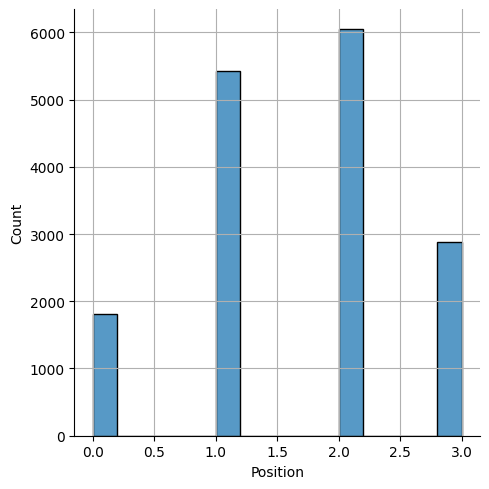

In [16]:
sns.displot(player_data['Position'], bins=15)
plt.grid()
plt.show()

In [17]:
player_data['OVR'] = pd.to_numeric(player_data['OVR'], errors='coerce')

player_data['OVR'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,OVR
0.005,49.0
0.010,50.0
0.050,55.0
0.100,58.0
0.500,66.0
0.900,75.0
0.950,77.0
0.990,83.0
0.995,85.0


In [18]:
new_players_data_corr_matrix = player_data.loc[:,:].copy()
print(new_players_data_corr_matrix)

       OVR  PAC  SHO  PAS  DRI  DEF  PHY  Acceleration  Sprint Speed  \
0       91   97   90   80   92   36   78            97            97   
1       91   66   80   86   84   87   85            65            66   
2       91   88   92   70   81   45   88            80            94   
3       90   80   87   83   88   78   83            81            80   
4       90   95   84   81   91   29   69            95            95   
...    ...  ...  ...  ...  ...  ...  ...           ...           ...   
16156   47   31   45   47   52   34   45            32            31   
16157   47   67   38   46   45   40   55            66            67   
16158   47   57   47   38   50   43   49            55            59   
16159   47   66   35   46   46   41   64            69            63   
16160   47   56   34   43   45   43   54            51            60   

       Positioning  ...  Strength  Aggression  Position  Height  Weight  \
0               93  ...        77          64         3   18

# Составляем матрицу корреляции

In [19]:
correlation_matrix = new_players_data_corr_matrix.corr()
print(correlation_matrix)

columns = new_players_data_corr_matrix.columns

                         OVR       PAC       SHO       PAS       DRI  \
OVR                 1.000000  0.274789  0.464423  0.707068  0.688645   
PAC                 0.274789  1.000000  0.333178  0.283510  0.519334   
SHO                 0.464423  0.333178  1.000000  0.679161  0.772237   
PAS                 0.707068  0.283510  0.679161  1.000000  0.850289   
DRI                 0.688645  0.519334  0.772237  0.850289  1.000000   
DEF                 0.360798 -0.196373 -0.408754  0.153771 -0.088188   
PHY                 0.564805 -0.085405  0.037739  0.192398  0.079745   
Acceleration        0.215771  0.730856  0.103720  0.132084  0.322353   
Sprint Speed        0.222276  0.741307  0.057660  0.072443  0.255873   
Positioning         0.350562  0.349577  0.389047  0.338640  0.451026   
Finishing           0.336307  0.335656  0.555217  0.330093  0.469062   
Shot Power          0.556535  0.272139  0.739677  0.589702  0.625326   
Long Shots          0.388201  0.287086  0.522146  0.419614  0.48

# Вычисляем среднее для числовых столбцов

In [20]:
mean_values = new_players_data_corr_matrix[columns].mean()
print("Средние значения:\n", mean_values)

Средние значения:
 OVR                    66.172390
PAC                    68.149558
SHO                    54.146835
PAS                    58.434874
DRI                    63.599158
DEF                    50.591981
PHY                    65.241755
Acceleration           64.778727
Sprint Speed           64.812264
Positioning            50.983293
Finishing              46.680218
Shot Power             58.000990
Long Shots             46.934719
Volleys                42.579543
Penalties              47.614813
Vision                 54.865107
Crossing               49.554916
Free Kick Accuracy     42.770621
Short Passing          59.507766
Long Passing           54.207165
Curve                  48.118743
Dribbling              56.346946
Agility                63.664687
Balance                64.103088
Reactions              62.223934
Ball Control           59.039787
Composure              58.299672
Interceptions          47.333271
Heading Accuracy       51.868696
Def Awareness          4

# Вычисляем стандартное отклонение (разброс) для числовых столбцов

In [21]:
std_values = new_players_data_corr_matrix[columns].std()
print("\nСтандартное отклонение (разброс):\n", std_values)


Стандартное отклонение (разброс):
 OVR                    6.761979
PAC                   10.612153
SHO                   13.740389
PAS                    9.660646
DRI                    9.262399
DEF                   16.323879
PHY                    9.509657
Acceleration          15.478648
Sprint Speed          15.258747
Positioning           19.903044
Finishing             19.912475
Shot Power            12.876878
Long Shots            19.479070
Volleys               17.707794
Penalties             15.710242
Vision                13.370436
Crossing              17.922018
Free Kick Accuracy    16.956133
Short Passing         14.183703
Long Passing          14.424724
Curve                 18.084827
Dribbling             18.810193
Agility               15.097148
Balance               14.640849
Reactions              8.757220
Ball Control          16.712129
Composure             12.155230
Interceptions         20.746819
Heading Accuracy      17.371728
Def Awareness         20.408949
Stan

# Проверяем как признаки влияют на наши классы

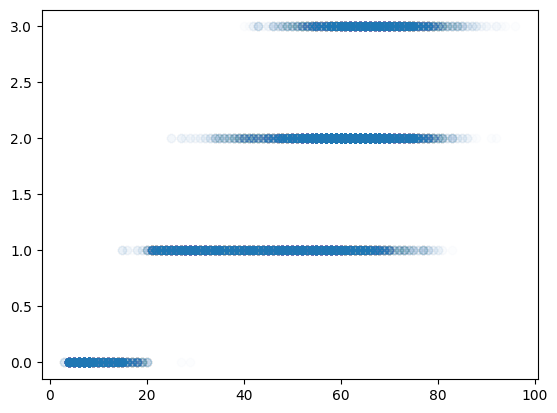

In [22]:
# как признак Positioning влияет на позицию
plt.scatter(new_players_data_corr_matrix['Positioning'], new_players_data_corr_matrix['Position'], alpha=0.01)
pass

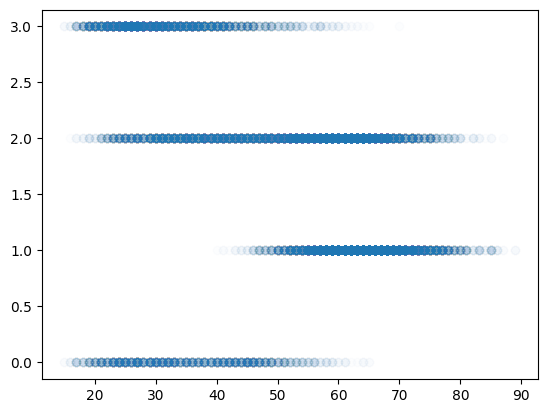

In [23]:
# признак DEF выще чаще всего у защитников(класс 1)
plt.scatter(new_players_data_corr_matrix['DEF'], new_players_data_corr_matrix['Position'], alpha=0.01)
pass

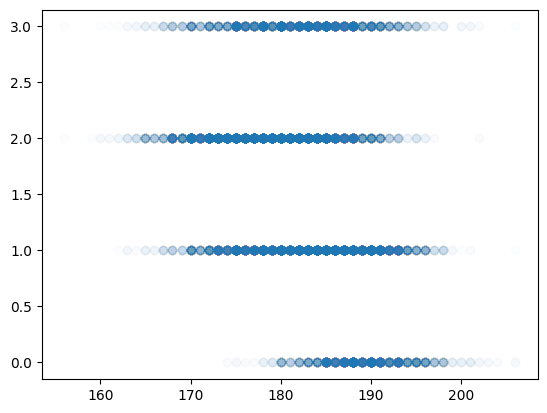

In [24]:
# Большой рост может быть у разных позиций, но вот маленького у вратарей почти не бывет
plt.scatter(new_players_data_corr_matrix['Height'], new_players_data_corr_matrix['Position'], alpha=0.01)
pass

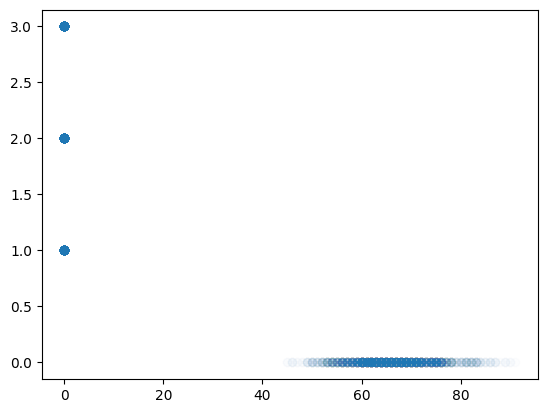

In [25]:
# Вратарски навыки только у вратарей
plt.scatter(new_players_data_corr_matrix['GK Reflexes'], new_players_data_corr_matrix['Position'], alpha=0.01)
pass


# Создаем диаграмму рассеяния

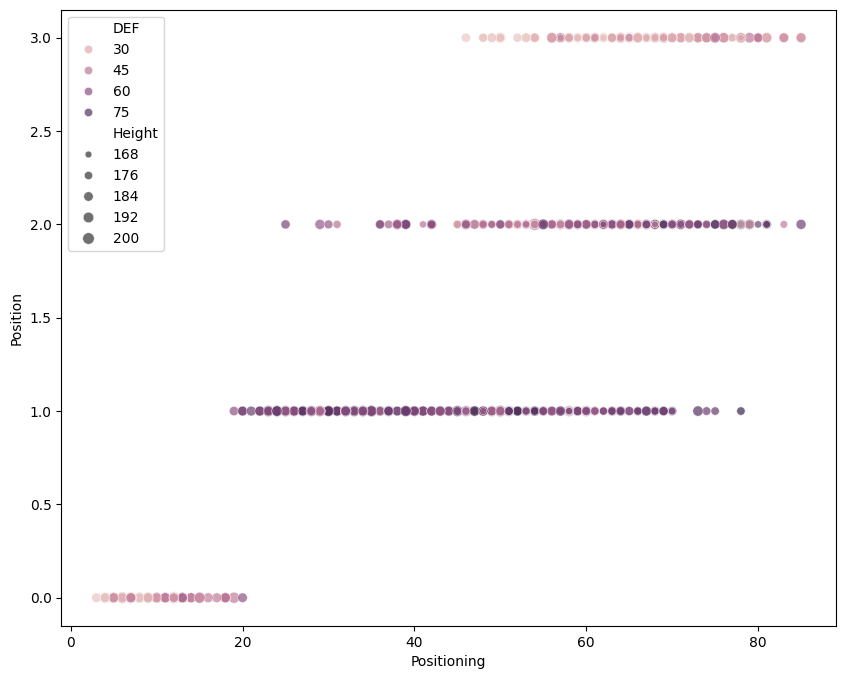

In [26]:
random_subset = np.random.choice(np.arange(new_players_data_corr_matrix.shape[0]), size=1000, replace=False)
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Positioning', y='Position', size='Height', hue='DEF', data=new_players_data_corr_matrix.iloc[random_subset], alpha=0.7)
pass

<ipython-input-27-ebe111384c1c>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


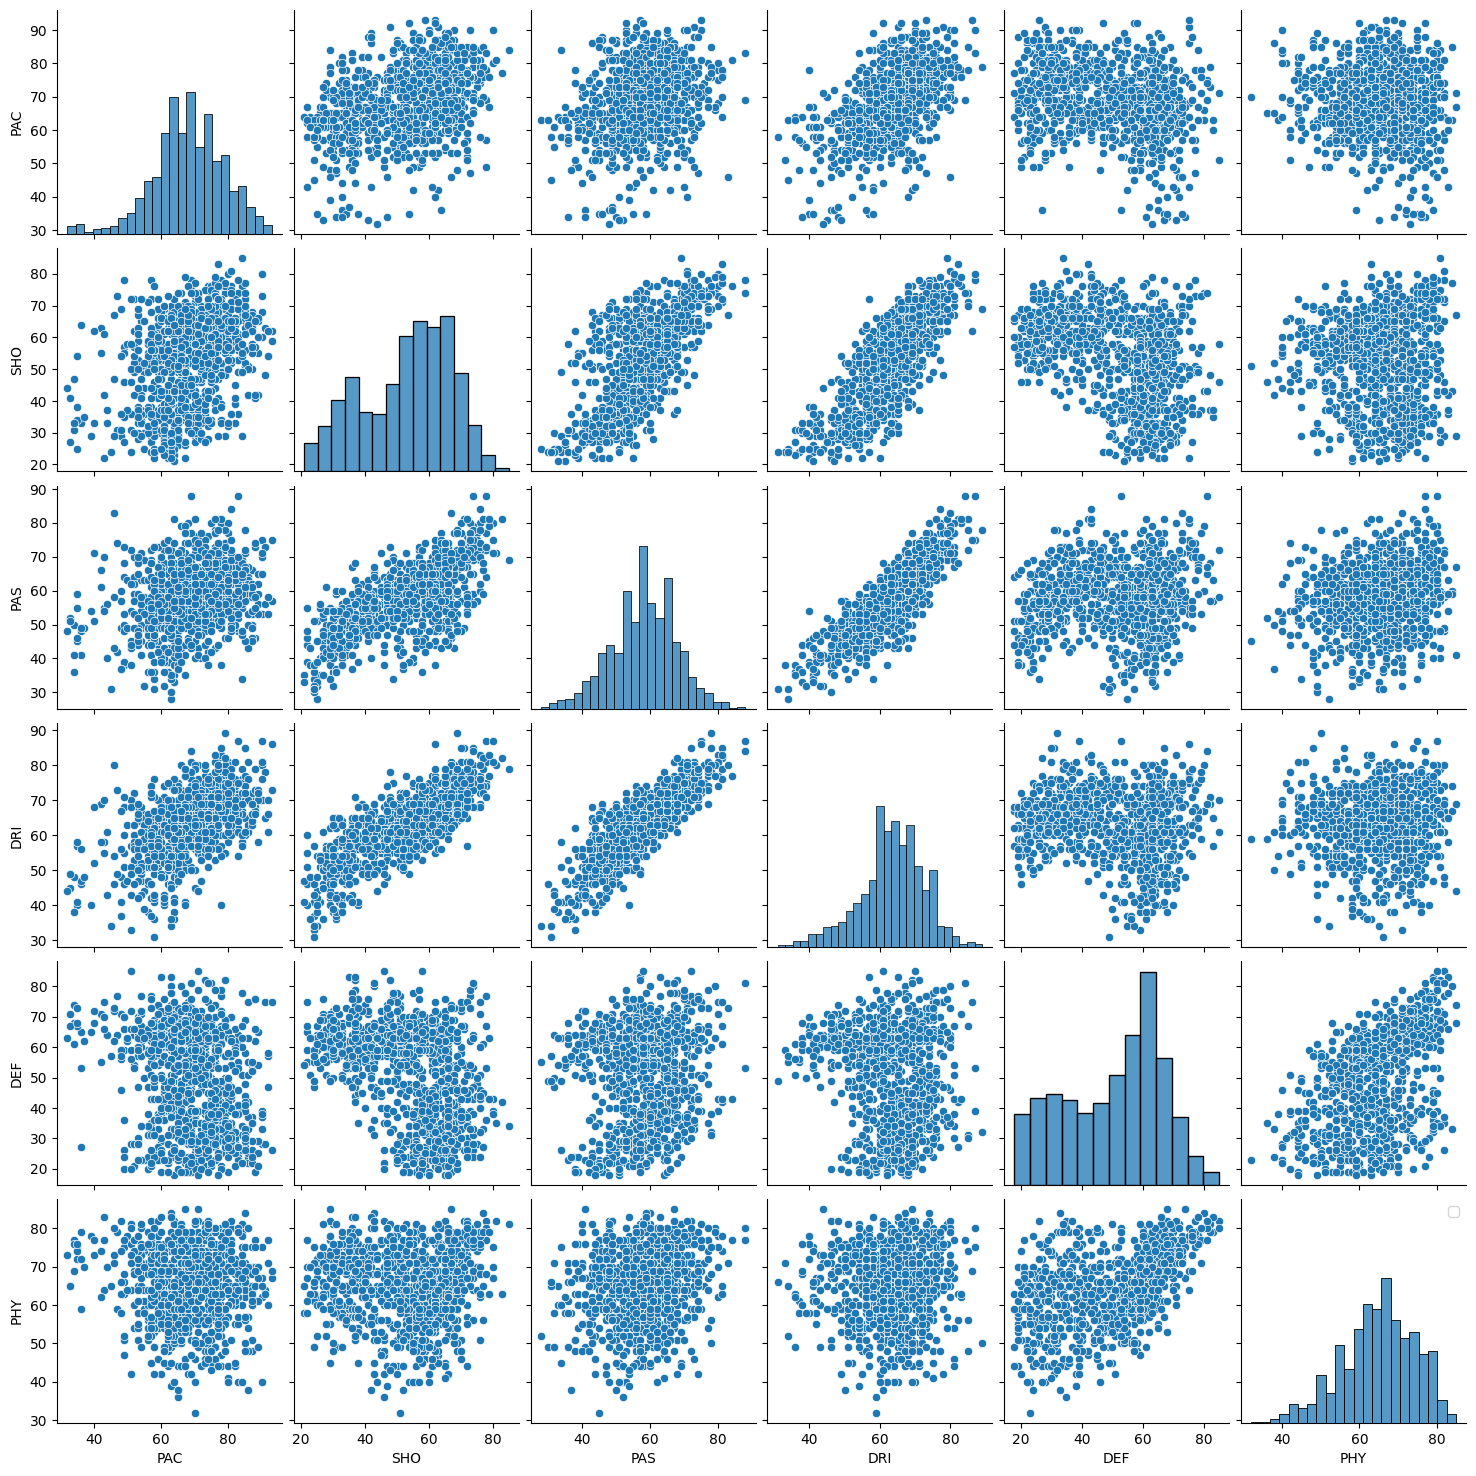

In [27]:
columns_to_plot = ['PAC', 'SHO', 'PAS', 'DRI','DEF','PHY']
sns.pairplot(new_players_data_corr_matrix.iloc[random_subset],vars=columns_to_plot, diag_kind='hist')
plt.legend()
pass

# Нормализуем данные, исключая столбец `Position`

In [28]:
# Инициализируем StandardScaler для нормализации данных
scaler = StandardScaler()

# Указываем столбцы, которые нужно нормализовать (исключая 'position')
columns_to_scale = new_players_data_corr_matrix.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Исключаем столбец 'position' из нормализуемых
columns_to_scale.remove('Position')

# Применяем стандартизацию к выбранным столбцам
new_players_data_corr_matrix[columns_to_scale] = scaler.fit_transform(new_players_data_corr_matrix[columns_to_scale])

# Выводим нормализованные данные
new_players_data_corr_matrix

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,...,Strength,Aggression,Position,Height,Weight,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,3.671762,2.718707,2.609407,2.232335,3.066346,-0.893932,1.341651,2.081724,2.109527,2.111135,...,0.944431,0.456566,3,0.019597,-0.040259,-0.353288,-0.353362,-0.353012,-0.352658,-0.353063
1,3.671762,-0.202562,1.881604,2.853430,2.202612,2.230422,2.077768,0.014296,0.077842,1.256968,...,1.429464,1.708738,2,1.331897,0.966454,-0.353288,-0.353362,-0.353012,-0.352658,-0.353063
2,3.671762,1.870597,2.754968,1.197175,1.878712,-0.342575,2.393246,0.983403,1.912912,2.261870,...,2.237853,1.887620,3,1.915142,2.692247,-0.353288,-0.353362,-0.353012,-0.352658,-0.353063
3,3.523872,1.116721,2.391066,2.542882,2.634479,1.679066,1.867449,1.048010,0.995377,2.010644,...,0.944431,1.708738,2,0.602841,-0.040259,-0.353288,-0.353362,-0.353012,-0.352658,-0.353063
4,3.523872,2.530238,2.172725,2.335850,2.958379,-1.322765,0.395215,1.952510,1.978450,1.809664,...,-0.025636,0.098803,3,-0.855270,-0.327891,-0.353288,-0.353362,-0.353012,-0.352658,-0.353063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16156,-2.835410,-3.500770,-0.665710,-1.183692,-1.252323,-1.016455,-2.128613,-2.117739,-2.215995,-0.602102,...,-2.369963,-0.557096,2,-1.875948,-1.909868,-0.353288,-0.353362,-0.353012,-0.352658,-0.353063
16157,-2.835410,-0.108328,-1.175173,-1.287208,-2.008090,-0.648884,-1.077018,0.078903,0.143380,-0.200141,...,-0.995702,0.158430,2,-0.855270,-0.184075,-0.353288,-0.353362,-0.353012,-0.352658,-0.353063
16158,-2.835410,-1.050673,-0.520149,-2.115335,-1.468257,-0.465099,-1.707975,-0.631775,-0.380925,-0.049406,...,-0.672347,-1.928522,1,-0.126214,-0.903156,-0.353288,-0.353362,-0.353012,-0.352658,-0.353063
16159,-2.835410,-0.202562,-1.393514,-1.287208,-1.900124,-0.587622,-0.130582,0.272724,-0.118773,-0.300631,...,0.216881,-0.139706,2,0.748652,-0.615523,-0.353288,-0.353362,-0.353012,-0.352658,-0.353063


# Строим корреляционную матрицу для нормализованных данных

In [29]:
correlation_matrix_normalized = new_players_data_corr_matrix.corr()

# Выводим корреляционную матрицу
correlation_matrix_normalized

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,...,Strength,Aggression,Position,Height,Weight,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
OVR,1.000000,0.274789,0.464423,0.707068,0.688645,0.360798,0.564805,0.215771,0.222276,0.350562,...,0.342093,0.380476,0.051064,0.040221,0.101827,-0.032621,-0.033540,-0.035201,-0.027651,-0.030663
PAC,0.274789,1.000000,0.333178,0.283510,0.519334,-0.196373,-0.085405,0.730856,0.741307,0.349577,...,-0.223888,-0.065733,0.214424,-0.357523,-0.322549,-0.067904,-0.071073,-0.072091,-0.067805,-0.068525
SHO,0.464423,0.333178,1.000000,0.679161,0.772237,-0.408754,0.037739,0.103720,0.057660,0.389047,...,-0.089969,-0.197583,0.346848,-0.089987,-0.034801,0.253133,0.254934,0.252276,0.255234,0.253573
PAS,0.707068,0.283510,0.679161,1.000000,0.850289,0.153771,0.192398,0.132084,0.072443,0.338640,...,-0.063636,0.090649,0.025621,-0.172489,-0.117583,0.168064,0.168317,0.175595,0.171401,0.168915
DRI,0.688645,0.519334,0.772237,0.850289,1.000000,-0.088188,0.079745,0.322353,0.255873,0.451026,...,-0.152608,-0.007103,0.216563,-0.268229,-0.206580,0.127371,0.125439,0.124181,0.129523,0.130951
DEF,0.360798,-0.196373,-0.408754,0.153771,-0.088188,1.000000,0.498599,0.088719,0.106794,0.051121,...,0.363575,0.672666,-0.301118,0.026436,0.042185,-0.315245,-0.315658,-0.315100,-0.313488,-0.314870
PHY,0.564805,-0.085405,0.037739,0.192398,0.079745,0.498599,1.000000,-0.074696,-0.001349,0.044127,...,0.855847,0.573805,-0.121556,0.417045,0.485053,-0.029343,-0.029040,-0.030133,-0.021663,-0.027788
Acceleration,0.215771,0.730856,0.103720,0.132084,0.322353,0.088719,-0.074696,1.000000,0.916894,0.717714,...,-0.108983,0.349923,0.550050,-0.543190,-0.479423,-0.660095,-0.660496,-0.659485,-0.657547,-0.659481
Sprint Speed,0.222276,0.741307,0.057660,0.072443,0.255873,0.106794,-0.001349,0.916894,1.000000,0.682458,...,-0.008311,0.374699,0.527151,-0.439243,-0.391024,-0.660858,-0.661488,-0.660724,-0.658571,-0.660271
Positioning,0.350562,0.349577,0.389047,0.338640,0.451026,0.051121,0.044127,0.717714,0.682458,1.000000,...,0.037146,0.472905,0.765687,-0.456500,-0.376401,-0.732155,-0.732168,-0.731344,-0.730189,-0.731677


# Визуальное представление кор матрицы

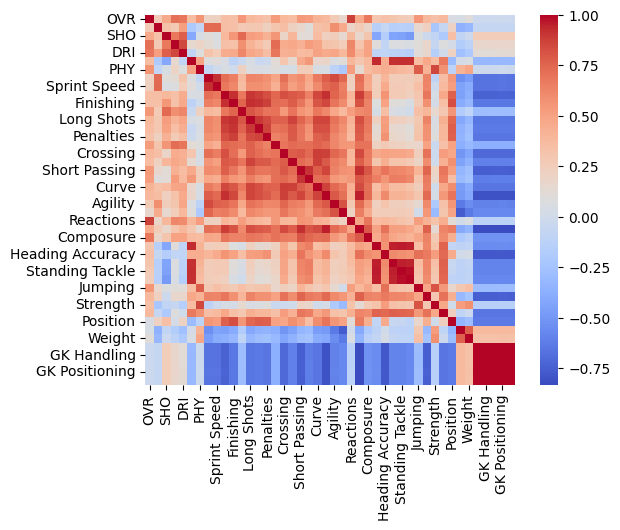

In [30]:
sns.heatmap(correlation_matrix_normalized, square=True, cmap='coolwarm')
pass

In [31]:
# Те признаки которые влияют друг на друга сильнее
correlation_matrix_normalized.where(np.triu(correlation_matrix_normalized > 0.5, k=1)).stack().sort_values(ascending=False)

GK Diving       GK Reflexes         0.999024
                GK Handling         0.998597
GK Handling     GK Positioning      0.998559
                GK Reflexes         0.998372
GK Positioning  GK Reflexes         0.998289
                                      ...   
Vision          Position            0.503536
Crossing        Heading Accuracy    0.502480
Vision          Stamina             0.501387
DRI             Composure           0.500464
SHO             Volleys             0.500072
Length: 305, dtype: float64

# Разбиваем данные на обучающую и тестовую выборку

In [98]:
from sklearn.model_selection import train_test_split

y = new_players_data_corr_matrix[['Position']].copy()
X = new_players_data_corr_matrix.drop(columns=['Position'])

N_train = 5000
N_test = new_players_data_corr_matrix.shape[0]-N_train
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = N_train, test_size = N_test,
                                                    stratify = y, random_state = 42)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10, p=1)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10, p=1)

In [66]:
No = 8
# Индексация с использованием iloc
Img = X_test.iloc[No, :]
dig = y_test.iloc[No, :]
dig

,7031
Position,1


In [79]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [68]:
y_train.shape

(5000, 1)

# Проверяем ошибки

In [80]:
np.mean(y_train['Position'] != y_train_pred), np.mean(y_test['Position'] != y_test_pred)


(np.float64(0.1074), np.float64(0.12436161634262163))

То есть, на тестовой у нас ошибка равна 12%, а на обучающей 10%, из 10 игроков, мы правильно угадываем девятерых. Что является хорошим значением

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[1254,    0,    0,    0],
       [   0, 3437,  304,    1],
       [   0,  358, 3636,  181],
       [   0,   10,  534, 1446]])

# Построение матрицы ошибок

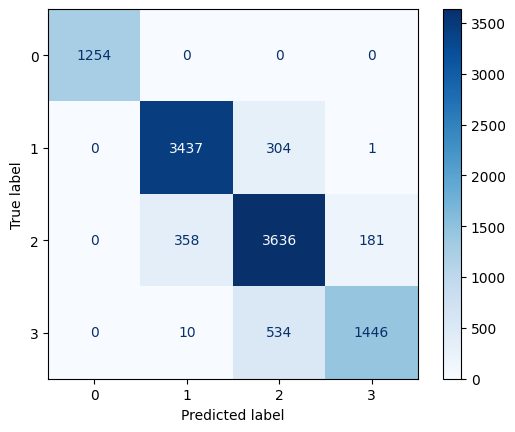

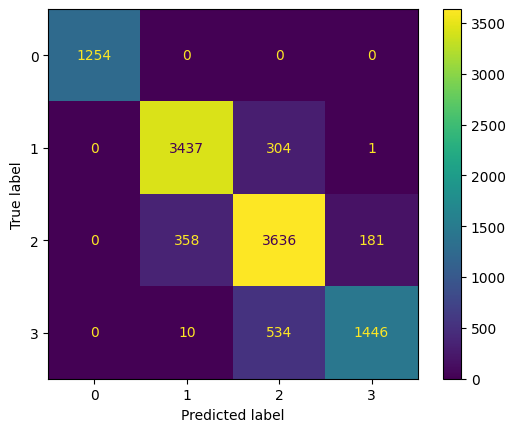

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

# Построение матрицы ошибок
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
disp.plot()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       0.90      0.92      0.91      3742
           2       0.81      0.87      0.84      4175
           3       0.89      0.73      0.80      1990

    accuracy                           0.88     11161
   macro avg       0.90      0.88      0.89     11161
weighted avg       0.88      0.88      0.87     11161



# Попробуем дерево решений

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Создаем и обучаем модель дерева решений
tree_model = DecisionTreeClassifier(max_depth=5,random_state=42)
tree_model.fit(X_train, y_train)

# Предсказываем на обучающей и тестовой выборках
y_train_pred_tree = tree_model.predict(X_train)
y_test_pred_tree = tree_model.predict(X_test)

# Вычисляем ошибку на обучающей и тестовой выборках
#np.mean(y_train['Position'] != y_train_pred), np.mean(y_test['Position'] != y_test_pred)
train_error_tree = np.mean(y_train['Position'] != y_train_pred_tree)
test_error_tree = np.mean(y_test['Position'] != y_test_pred_tree)

print(f'Train Error (Decision Tree): {train_error_tree:.4f}')
print(f'Test Error (Decision Tree): {test_error_tree:.4f}')

# Выводим отчет по классификации
print(classification_report(y_test, y_test_pred_tree))


Train Error (Decision Tree): 0.1810
Test Error (Decision Tree): 0.1858
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       0.81      0.88      0.85      3742
           2       0.76      0.74      0.75      4175
           3       0.80      0.73      0.76      1990

    accuracy                           0.81     11161
   macro avg       0.84      0.84      0.84     11161
weighted avg       0.81      0.81      0.81     11161



Подбор высоты с помощью GridSearchCV

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Определяем модель дерева решений
tree_model = DecisionTreeClassifier(random_state=42)

# Определяем параметры для поиска по сетке
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50]
}

# Создаем объект GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Выполняем поиск по сетке
grid_search.fit(X_train, y_train)

# Выводим лучшие параметры и оценку
print(f'Best max_depth: {grid_search.best_params_["max_depth"]}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.4f}')

# Обучаем модель с лучшими параметрами на всей обучающей выборке
best_tree_model = grid_search.best_estimator_

# Предсказываем на обучающей и тестовой выборках
y_train_pred_tree = best_tree_model.predict(X_train)
y_test_pred_tree = best_tree_model.predict(X_test)

# Вычисляем ошибку на обучающей и тестовой выборках
train_error_tree = np.mean(y_train['Position'] != y_train_pred_tree)
test_error_tree = np.mean(y_test['Position'] != y_test_pred_tree)

print(f'Train Error (Decision Tree): {train_error_tree:.4f}')
print(f'Test Error (Decision Tree): {test_error_tree:.4f}')

# Выводим отчет по классификации
print(classification_report(y_test, y_test_pred_tree))


Best max_depth: 10
Best cross-validation accuracy: 0.8340
Train Error (Decision Tree): 0.0572
Test Error (Decision Tree): 0.1686
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       0.87      0.87      0.87      3742
           2       0.77      0.80      0.78      4175
           3       0.79      0.72      0.75      1990

    accuracy                           0.83     11161
   macro avg       0.86      0.85      0.85     11161
weighted avg       0.83      0.83      0.83     11161



# Теперь Бэггинг

In [100]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

y_train_pred_bagging = bagging_model.predict(X_train)
y_test_pred_bagging = bagging_model.predict(X_test)

train_error_bagging = np.mean(y_train['Position'] != y_train_pred_bagging)
test_error_bagging = np.mean(y_test['Position'] != y_test_pred_bagging)

print(f'Train Error (Bagging): {train_error_bagging:.4f}')
print(f'Test Error (Bagging): {test_error_bagging:.4f}')

print(classification_report(y_test, y_test_pred_bagging))

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:878: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Error (Bagging): 0.0366
Test Error (Bagging): 0.1235
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       0.91      0.92      0.91      3742
           2       0.82      0.87      0.84      4175
           3       0.87      0.74      0.80      1990

    accuracy                           0.88     11161
   macro avg       0.90      0.88      0.89     11161
weighted avg       0.88      0.88      0.88     11161



# Теперь бустинг

In [106]:
from sklearn.ensemble import AdaBoostClassifier

bagging_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

y_train_pred_bagging = bagging_model.predict(X_train)
y_test_pred_bagging = bagging_model.predict(X_test)

train_error_bagging = np.mean(y_train['Position'] != y_train_pred_bagging)
test_error_bagging = np.mean(y_test['Position'] != y_test_pred_bagging)

print(f'Train Error (Boosting): {train_error_bagging:.4f}')
print(f'Test Error (Boosting): {test_error_bagging:.4f}')

print(classification_report(y_test, y_test_pred_bagging))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Error (Boosting): 0.0000
Test Error (Boosting): 0.1122
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       0.93      0.93      0.93      3742
           2       0.83      0.88      0.85      4175
           3       0.87      0.75      0.81      1990

    accuracy                           0.89     11161
   macro avg       0.91      0.89      0.90     11161
weighted avg       0.89      0.89      0.89     11161



# Вывод
Наш датасет содержит характеристики игроков, которые оказывают значительное влияние на их позиции на поле. Модель демонстрирует `88%` точности, что свидетельствует о высоком качестве классификации. На основе анализа метрик можно сделать вывод, что модель лучше справляется с классификацией классов `0` и `1` (вратари и защитники), где значения `precision`, `recall` и `F1-score` высокие, что указывает на точность предсказаний.

Для классов `2` и `3` (полузащитники и нападающие) метрики чуть ниже, особенно для класса `3`, где `F1-score` составляет `0.80`, что указывает на среднее качество предсказаний для этой позиции. Модель испытывает сложности с этими классами, что может быть связано с тем, что защитники и полузащитники часто обладают схожими характеристиками, и это ведет к ошибкам в классификации.

Как можно видеть по ошибкам, метод K ближайших соседей при всей своей простоте работает отлично, и улучшать его нет особого смысла.

# Корреляционная матрица
Анализ корреляционной матрицы показывает, что существует взаимосвязь между характеристиками игроков. Например, высокие значения скорости часто коррелируют с высокими показателями дриблинга и физической подготовки. Это может помочь модели в предсказаниях для некоторых классов, но схожие характеристики между защитниками и полузащитниками затрудняют точную классификацию.  

# Матрица ошибок
Матрица ошибок и `classification report` подтверждают, что основная проблема заключается в схожести характеристик игроков разных классов, что приводит к перекрестным ошибкам, особенно между защитниками и полузащитниками. Ошибки модели возникают, когда классы обладают схожими игровыми стилями и характеристиками, что характерно для реальной жизни, где позиции игроков часто пересекаются (например, защитники могут выполнять функции полузащитников и наоборот).

# Кластеризация

In [41]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [42]:
# 1. KMeans
kmeans = KMeans(n_clusters=len(y['Position'].unique()), random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# 2. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# 3. Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=len(y['Position'].unique()))
agg_labels = agg_clustering.fit_predict(X)

In [43]:
# Сравнение с истинными метками
def evaluate_clustering(true_labels, predicted_labels, method_name):
    ari = adjusted_rand_score(true_labels, predicted_labels)
    print(f"{method_name} Adjusted Rand Index: {ari}")
    try:
        silhouette = silhouette_score(X, predicted_labels)
        print(f"{method_name} Silhouette Score: {silhouette}")
    except:
        print(f"{method_name} Silhouette Score: Not applicable (less than 2 clusters)")


In [44]:
# Оценка KMeans
evaluate_clustering(y['Position'], kmeans_labels, "KMeans")

# Оценка DBSCAN
evaluate_clustering(y['Position'], dbscan_labels, "DBSCAN")

# Оценка Agglomerative Clustering
evaluate_clustering(y['Position'], agg_labels, "Agglomerative Clustering")

KMeans Adjusted Rand Index: 0.3139990669357077
KMeans Silhouette Score: 0.2529620457404116
DBSCAN Adjusted Rand Index: 0.0
DBSCAN Silhouette Score: Not applicable (less than 2 clusters)
Agglomerative Clustering Adjusted Rand Index: 0.34939586415006624
Agglomerative Clustering Silhouette Score: 0.21047293433591022


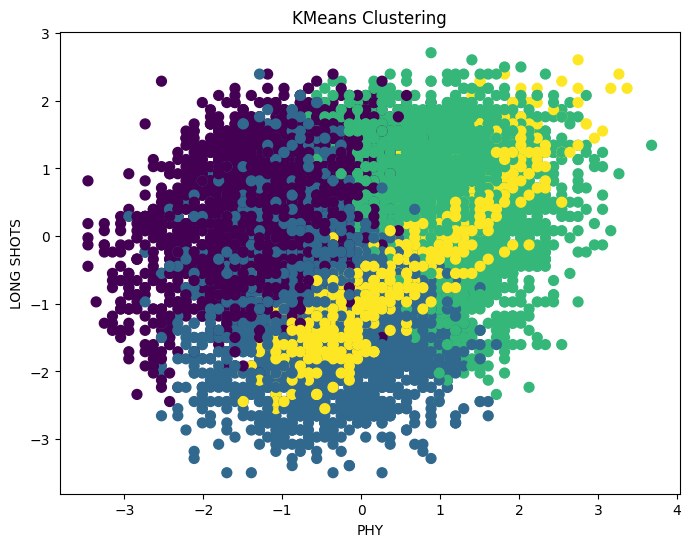

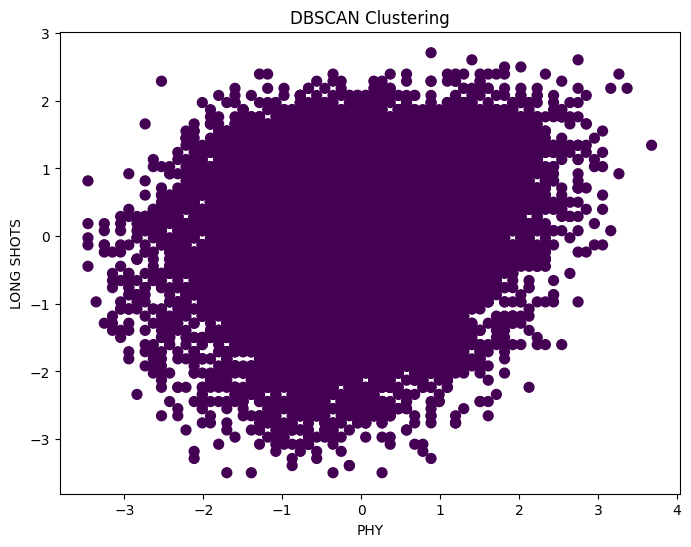

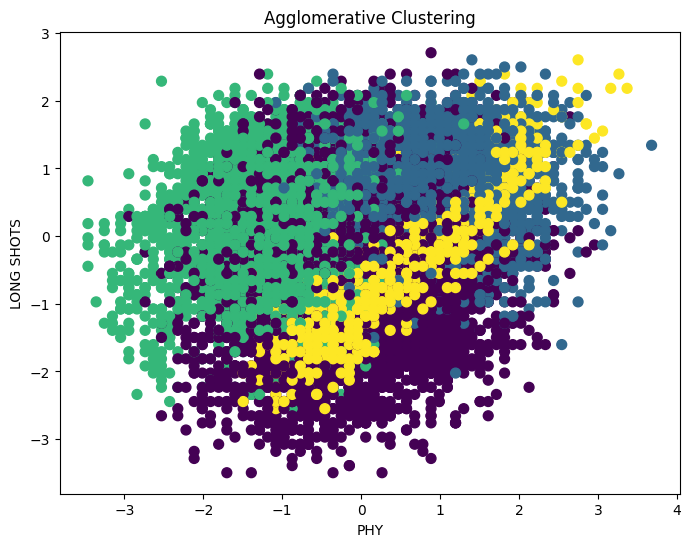

In [45]:
import matplotlib.pyplot as plt

# Функция для визуализации кластеров без цветовой маркировки
def plot_clusters_without_labels(X, labels, title):
    plt.figure(figsize=(8, 6))
    X_np = X.values  # Преобразуем X в numpy-массив

    # Визуализация кластеров без цветовой маркировки
    plt.scatter(X_np[:, 3], X_np[:, 6], c=labels, cmap='viridis', s=50)

    plt.title(title)
    plt.xlabel('PHY')  # Подпись для оси X
    plt.ylabel('LONG SHOTS')  # Подпись для оси Y
    plt.show()

# Визуализация KMeans
plot_clusters_without_labels(X, kmeans_labels, "KMeans Clustering")

# Визуализация DBSCAN
plot_clusters_without_labels(X, dbscan_labels, "DBSCAN Clustering")

# Визуализация Agglomerative Clustering
plot_clusters_without_labels(X, agg_labels, "Agglomerative Clustering")

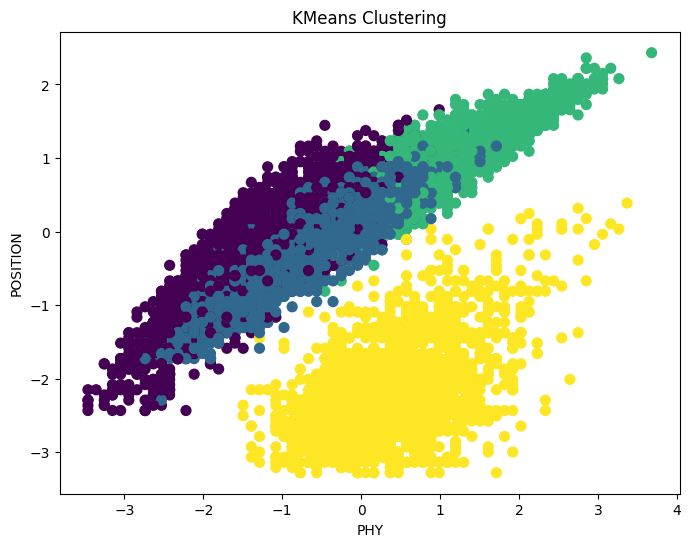

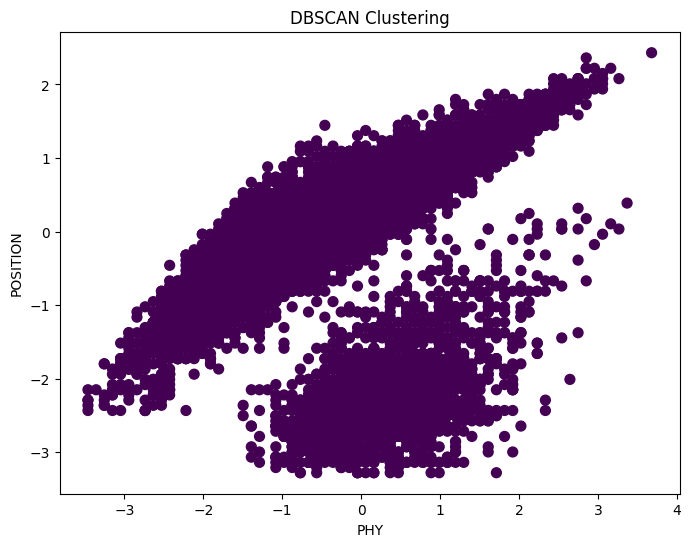

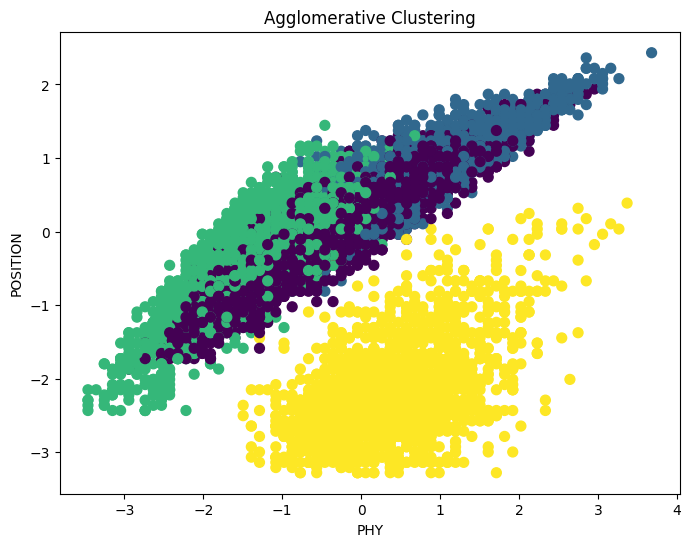

In [46]:
import matplotlib.pyplot as plt

# Функция для визуализации кластеров без цветовой маркировки
def plot_clusters_without_labels(X, labels, title):
    plt.figure(figsize=(8, 6))
    X_np = X.values  # Преобразуем X в numpy-массив

    # Визуализация кластеров без цветовой маркировки
    plt.scatter(X_np[:, 3], X_np[:, 18], c=labels, cmap='viridis', s=50)

    plt.title(title)
    plt.xlabel('PHY')  # Подпись для оси X
    plt.ylabel('POSITION')  # Подпись для оси Y
    plt.show()

# Визуализация KMeans
plot_clusters_without_labels(X, kmeans_labels, "KMeans Clustering")

# Визуализация DBSCAN
plot_clusters_without_labels(X, dbscan_labels, "DBSCAN Clustering")

# Визуализация Agglomerative Clustering
plot_clusters_without_labels(X, agg_labels, "Agglomerative Clustering")

#Общие выводы:  

Все методы кластеризации показали низкие значения ARI и Silhouette Score, что говорит о том, что данные сложно кластеризовать. Данные имеют сложную структуру, они не могут быть опредлены обучением без учителя.

DBSCAN не смог найти кластеры, что может быть связано с тем, что невозможно найти даже минимальное расстояние между кластерами, все элементы  идут друг за другом(это можно наблюдать на графиках).

Как видно из зависимости позиции от физических данных игрока, разделение на классы всё таки возмонжо получить, но для этого необходимо брать только те данные из таблицы, которые оказывают наибольшее влияние на неё.

Для данный работы лучше использовать обучение с учителем.